#### <p style="background-color:green;font-family: Franklin Gothic Medium;color:#FFF9ED;font-size:185%;text-align:center;border-radius:8px 8px;"><br> 📚 Automatic Ticket Classification - NLP Case Study🌴<br><br>  <i style="font-style: normal;"> <span style ="color:orange; text-align:left; font-size: 36px; font-family: Ariel large;"><b>😊by Shu-Ren Chang Ph.D.</b></span></i><br><br> </p>



## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1004]:
#!python -m spacy download en_core_web_sm

In [1005]:
#!pip install -U pip setuptools wheel
#!pip install -U spacy

In [1006]:
import matplotlib.pyplot as plt  
import numpy as np
from sklearn import metrics

In [1007]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.metrics import plot_roc_curve
from pprint import pprint

In [1008]:
#!pip install -U scikit-learn

In [1009]:
# Import Textblob for extracting noun phrases
#!pip install textblob

from textblob import TextBlob

In [1010]:
# Installing wordcloud
#!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [1011]:
## Set limits for displaying rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [1012]:
# Opening JSON file 
# Write the path to your data file and load it 
f = open('complaints-2021-05-14_08_16.json',)
  
# Returns JSON object as a dictionary 
data = json.load(f)

# Create a dataframe out of dictionary 
df = pd.json_normalize(data)

## Data preparation

In [1013]:
# Inspect the dataframe to understand the given data.
df.head()


,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [1014]:
#shape of dataframe
df.shape

(78313, 22)

In [1015]:
#print the column names
col_list=list(df.columns)
col_list

['_index',
 '_type',
 '_id',
 '_score',
 '_source.tags',
 '_source.zip_code',
 '_source.complaint_id',
 '_source.issue',
 '_source.date_received',
 '_source.state',
 '_source.consumer_disputed',
 '_source.product',
 '_source.company_response',
 '_source.company',
 '_source.submitted_via',
 '_source.date_sent_to_company',
 '_source.company_public_response',
 '_source.sub_product',
 '_source.timely',
 '_source.complaint_what_happened',
 '_source.sub_issue',
 '_source.consumer_consent_provided']

In [1016]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [1017]:
df.describe()

,_score
count,78313.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


##### The `_score` variable is the only numeric column with all values at 0.0

In [1018]:
# check the percentage of the missing values in all variables again
round(df.isna().sum()*100/78313,2)

_index                                0.00
_type                                 0.00
_id                                   0.00
_score                                0.00
_source.tags                         86.08
_source.zip_code                      8.63
_source.complaint_id                  0.00
_source.issue                         0.00
_source.date_received                 0.00
_source.state                         2.54
_source.consumer_disputed             0.00
_source.product                       0.00
_source.company_response              0.00
_source.company                       0.00
_source.submitted_via                 0.00
_source.date_sent_to_company          0.00
_source.company_public_response      99.99
_source.sub_product                  13.50
_source.timely                        0.00
_source.complaint_what_happened       0.00
_source.sub_issue                    59.12
_source.consumer_consent_provided     1.29
dtype: float64

In [1019]:
# Convert the '_source.complaint_what_happened' variable with blank rows into NaN values
df['_source.complaint_what_happened'].replace("", np.nan, inplace=True)

In [1020]:
# check the percentage of the missing values in all variables again
round(df.isna().sum()*100/78313,2)

_index                                0.00
_type                                 0.00
_id                                   0.00
_score                                0.00
_source.tags                         86.08
_source.zip_code                      8.63
_source.complaint_id                  0.00
_source.issue                         0.00
_source.date_received                 0.00
_source.state                         2.54
_source.consumer_disputed             0.00
_source.product                       0.00
_source.company_response              0.00
_source.company                       0.00
_source.submitted_via                 0.00
_source.date_sent_to_company          0.00
_source.company_public_response      99.99
_source.sub_product                  13.50
_source.timely                        0.00
_source.complaint_what_happened      73.09
_source.sub_issue                    59.12
_source.consumer_consent_provided     1.29
dtype: float64

#### The data with "_source.complaint_what_happened" has 73.09 % of null values which should be remvoed

In [1021]:
#Dropping NaN rows from "_source.complaint_what_happened"
df.dropna(subset=['_source.complaint_what_happened'], inplace=True)

#New shape of df
df.shape

(21072, 22)

In [1022]:
#Assign new column names

df.columns=[re.sub("^_", "", col) for col in df.columns]

#Removing "source." from column names
df.columns=[re.sub(r'^\bsource\b\.', '', col) for col in df.columns]
#The r’’ prefix in the code indicates that the string is a raw string, which means that it does not interpret any escape sequences such as \n, \t, etc
#This is useful for regular expressions, which often use \ characters to indicate special patterns or modifiers.
#For example, the regular expression r’^\bsource\b.’ matches the word ‘source’ followed by a dot, only at the beginning of a string. 
#The \b means a word boundary, and the . means a literal dot. Without the r’’ prefix, you would have to write ‘\\^\\bsource\\b\\.’ to escape the \ characters.

list(df.columns)

['index',
 'type',
 'id',
 'score',
 'tags',
 'zip_code',
 'complaint_id',
 'issue',
 'date_received',
 'state',
 'consumer_disputed',
 'product',
 'company_response',
 'company',
 'submitted_via',
 'date_sent_to_company',
 'company_public_response',
 'sub_product',
 'timely',
 'complaint_what_happened',
 'sub_issue',
 'consumer_consent_provided']

In [1023]:
df.head()

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
10,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,N/A,"Credit reporting, credit repair services, or other personal consumer reports",Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",Information belongs to someone else,Consent provided
11,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,N/A,"Credit reporting, credit repair services, or other personal consumer reports",Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported i

In [1024]:
#Assign nan in place of blanks in the complaints column
df[df.loc[:, 'complaint_what_happened'] == ''] = np.nan

In [1025]:
# Check if blank values still exist
df[df.loc[:, 'complaint_what_happened'] == '']

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided


In [1026]:
df.shape

(21072, 22)

In [1027]:
#Remove all rows where complaints column is nan
df = df[~df['complaint_what_happened'].isnull()]
# By applying the ~ operator, the code selects only the rows where the complaint column is not missing

In [1028]:
df.shape

(21072, 22)

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [1029]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_texts(text):
    #Make the text lowercase
    text=text.lower()
    
    #Remove text in square brackets
    text=re.sub(r'\[.*?\]','',text)
    
    #Remove punctuation
    pattern = '[^\w\s]' 
    text = re.sub(pattern, '', text) 
    #text=re.sub(r'[%s]%re.escape(string.punctuation)','',text)
    
    #Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    return text



In [1030]:
#Cleaning df['complaint_what_happened']
df['complaint_what_happened']= df['complaint_what_happened'].apply(lambda x: clean_texts(x))

In [1031]:
#Write your function to Lemmatize the texts
def lemmmatize_text(text):     
        
    # Initialize empty list to store lemmas
    lemma_list = []
    
    # Extract lemmas of given text and add to the list 'sent'
    doc = nlp(text)
    for token in doc:
        lemma_list.append(token.lemma_)
        
    # return string converted form of the list of lemmas
    return " ".join(lemma_list)

In [1032]:
# Add a column for lemmatized complaints to the dataframe
df["lemmatized_complaint"] =  df.apply(lambda x: lemmmatize_text(x['complaint_what_happened']), axis=1)

# View the dataframe
df.head()

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided,lemmatized_complaint
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,Didn't receive enough information to verify debt,Consent provided,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,Problem with rewards from credit card,Consent provided,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I
10,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,N/A,"Credit reporting, credit repair services, or other personal consumer reports",Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,Information belongs to someone else,Consent provided,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant
11,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,N/A,"Credit reporting, credit repair services, or other personal consumer reports",Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately co

In [1033]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean=df[['complaint_what_happened','lemmatized_complaint']]

In [1034]:
df_clean.head()

,complaint_what_happened,lemmatized_complaint
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on while try to book a xxxx xxxx ticket I come across an offer for to be apply towards the ticket if I apply for a reward card I put in my information for the offer and within less than a minute be notify via the screen that a decision could not be make I immediately contact xxxx and be refer to chase bank I then immediately contact chase bank within no more than of get the notification on the screen and I be tell by the chase representative I speak with that my application be deny but she could not st

In [1035]:
#Write your function to extract the POS tags 
def extract_POS_tags(text):
    sent = []
    blob = TextBlob(text)
    sent = [word for (word,tag) in blob.tags if tag=='NN']
    return " ".join(sent)

In [1036]:
# Extract Complaint after removing POS tags
df_clean.loc[:,'complaint_POS_removed'] = df_clean['lemmatized_complaint'].apply(extract_POS_tags) 
#this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].
#df_clean.loc[:, 'Topic'] = df_clean['Topic'].map(Topic_names)

C:\Users\ISBE\AppData\Local\Temp\ipykernel_23676\3641917423.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1037]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean.head()

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent upgrade date agent information order account change date xxxxxxxx consent xxxx recording agent
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card report application identity consent service credit identity applicant
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,on while try to book a xxxx xxxx ticket I come across an offer for to be apply towards the ticket if I apply for a reward card I put in my infor

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [1038]:
#lenght of character in 'complaint_POS_removed'
char_len=[len(x) for x in df_clean['complaint_POS_removed']]
char_len[:10]

[159, 105, 74, 414, 161, 7, 629, 605, 1186, 51]

Text(0, 0.5, 'No. of Complaints')

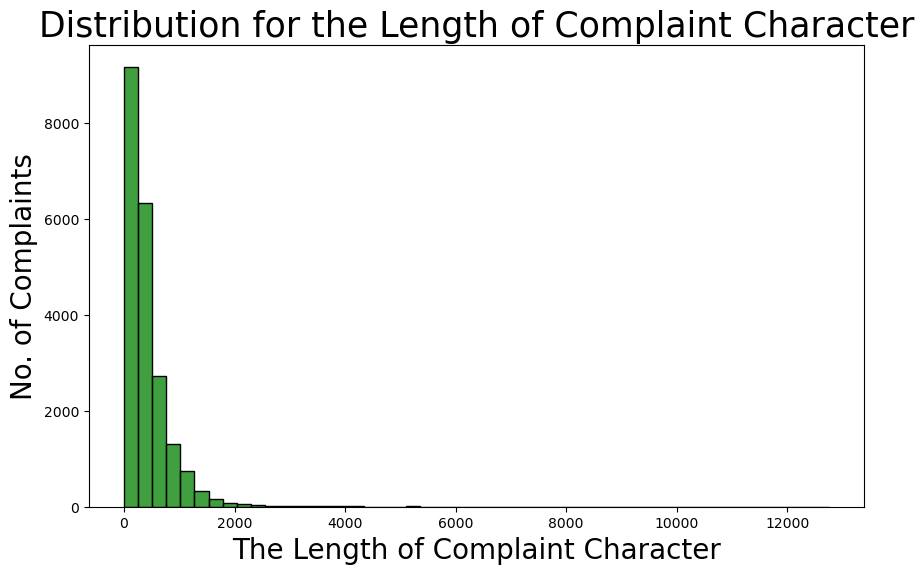

In [1039]:
## Write your code here to visualise the data according to the 'Complaint' character length
plt.figure(figsize=[10,6])
sns.histplot(data = char_len, bins=50, color="green")
plt.title('Distribution for the Length of Complaint Character', fontsize=25)
plt.xlabel('The Length of Complaint Character',size=20)
plt.ylabel('No. of Complaints',size=20)

**Results:** The distribution is highly skewed to the right. It is not a normal distribution.

#### Find the top 40 words by frequency among all the articles after processing the text.

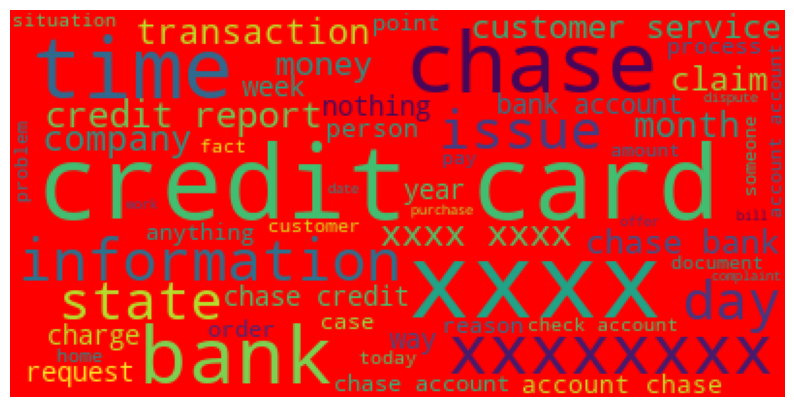

In [1040]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
stop_words = set(STOPWORDS)
word_cloud = WordCloud(
                          background_color='red',
                          stopwords=stop_words,
                          max_font_size=55,
                          max_words=55, 
                          random_state=500
                         ).generate(str(df_clean['complaint_POS_removed']))

fig = plt.figure(figsize=(10,14))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

**Results:** The top words as observed from the word cloud are: credit, card, time, bank, account, chase, state, etc.

In [1041]:
#Removing -PRON- from the text corpus
df_clean.loc[:,'Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')


C:\Users\ISBE\AppData\Local\Temp\ipykernel_23676\1739779485.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Find the top unigrams, bigrams, and trigrams by frequency among all the complaints after processing the text.

In [1042]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 


In [1043]:
# Creating a function to extract top ngrams(unigram/bigram/trigram) based on the function inputs
def create_top_N_grams(text, n=None, ngram=(1,1)):
  vec = CountVectorizer(stop_words='english', ngram_range=ngram).fit(text)
  bagofwords = vec.transform(text)
  sum_words = bagofwords.sum(axis=0)
  words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
  words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse=True)
  return words_frequency[:n]

In [1044]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
top_30_words = create_top_N_grams(df_clean['Complaint_clean'].values.astype('U'), n=30, ngram=(1,1))
df_unigram = pd.DataFrame(top_30_words, columns=['unigram', 'count'])
df_unigram

,unigram,count
0,account,47514
1,chase,46698
2,xxxx,36562
3,credit,34148
4,card,29278
5,bank,28402
6,payment,21165
7,time,16021
8,charge,14996
9,day,12972


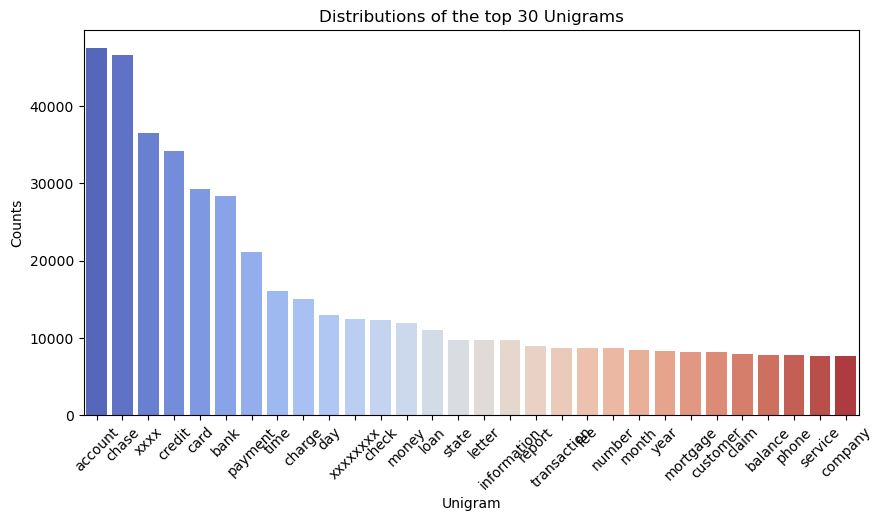

In [1045]:
# Plot top 30 Unigrams
plt.figure(figsize=[10,5])
sns.barplot(x=df_unigram['unigram'], y=df_unigram['count'], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Unigram")
plt.ylabel("Counts")
plt.title("Distributions of the top 30 Unigrams")
plt.show()

In [1046]:
#Print the top 10 words in the unigram frequency
df_unigram.head(10)

,unigram,count
0,account,47514
1,chase,46698
2,xxxx,36562
3,credit,34148
4,card,29278
5,bank,28402
6,payment,21165
7,time,16021
8,charge,14996
9,day,12972


In [1047]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
top_30_words = create_top_N_grams(df_clean['Complaint_clean'].values.astype('U'), n=30, ngram=(2,2))
df_bigram = pd.DataFrame(top_30_words, columns=['bigram', 'count'])
df_bigram

,bigram,count
0,credit card,12778
1,credit report,3955
2,xxxx xxxx,3953
3,customer service,3081
4,chase credit,2966
5,chase bank,2939
6,bank account,2729
7,account chase,2594
8,chase account,2564
9,check account,2414


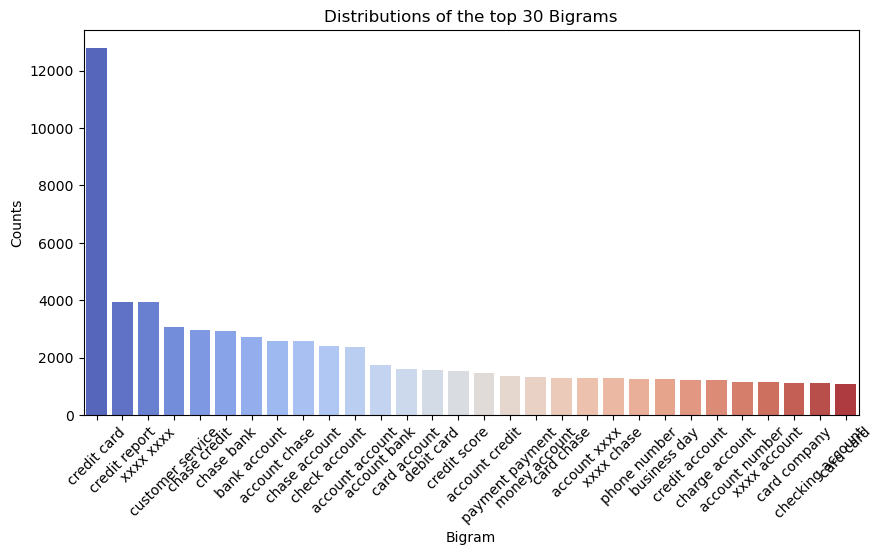

In [1048]:
# Plot top 30 Bigrams
plt.figure(figsize=[10,5])
sns.barplot(x=df_bigram['bigram'], y=df_bigram['count'], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Bigram")
plt.ylabel("Counts")
plt.title("Distributions of the top 30 Bigrams")
plt.show()

In [1049]:
#Print the top 10 words in the bigram frequency
df_bigram.head(10)

,bigram,count
0,credit card,12778
1,credit report,3955
2,xxxx xxxx,3953
3,customer service,3081
4,chase credit,2966
5,chase bank,2939
6,bank account,2729
7,account chase,2594
8,chase account,2564
9,check account,2414


In [1050]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
top_30_words = create_top_N_grams(df_clean['Complaint_clean'].values.astype('U'), n=30, ngram=(3,3))
df_trigram = pd.DataFrame(top_30_words, columns=['trigram', 'count'])
df_trigram

,trigram,count
0,chase credit card,2063
1,credit card account,1022
2,credit card company,991
3,credit card chase,633
4,credit card credit,513
5,inquiry credit report,481
6,charge credit card,422
7,xxxx xxxx xxxx,411
8,account credit card,398
9,card credit card,387


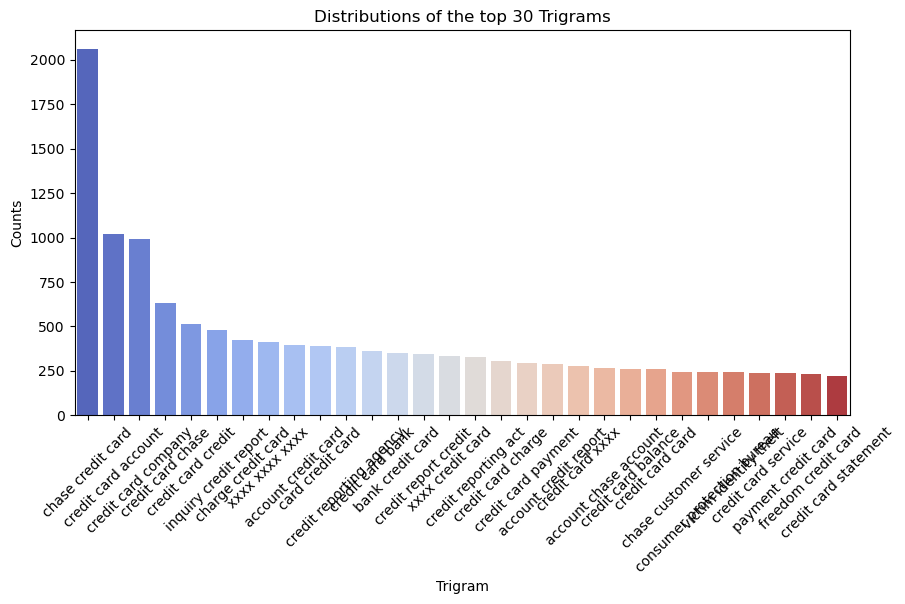

In [1051]:
# Plott top 30 Trigram
plt.figure(figsize=[10,5])
sns.barplot(x=df_trigram['trigram'], y=df_trigram['count'], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Trigram")
plt.ylabel("Counts")
plt.title("Distributions of the top 30 Trigrams")
plt.show()

In [1052]:
#Print the top 10 words in the trigram frequency
df_trigram.head(10)

,trigram,count
0,chase credit card,2063
1,credit card account,1022
2,credit card company,991
3,credit card chase,633
4,credit card credit,513
5,inquiry credit report,481
6,charge credit card,422
7,xxxx xxxx xxxx,411
8,account credit card,398
9,card credit card,387


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [1053]:
df_clean.loc[:, 'Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [1054]:
df_clean.shape

(21072, 4)

In [1055]:
#All masked texts has been removed
df_clean.head()

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed,Complaint_clean
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent upgrade date agent information order account change date xxxxxxxx consent xxxx recording agent,card agent upgrade date agent information order account change date consent recording agent
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card report application identity consent service credit identity applicant,card report application identity consent service credit identity applicant
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being repo

## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [1056]:
#Write your code here to initialise the TfidfVectorizer 

tfidf =TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [1057]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean['Complaint_clean'])

In [1058]:
dtm

<21072x7262 sparse matrix of type '<class 'numpy.float64'>'
	with 643599 stored elements in Compressed Sparse Row format>

In [1059]:
tfidf.get_feature_names_out()[:10]

array(['aa', 'aarp', 'abandon', 'abandonment', 'abatement',
       'abbreviation', 'abd', 'abide', 'ability', 'abovementione'],
      dtype=object)

In [1060]:
len(tfidf.get_feature_names_out())

7262

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [1061]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [1062]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5 #write the value you want to test out

#keep the random_state =40
nmf_model =  NMF(n_components=num_topics, random_state=40) #write your code here

W1 = nmf_model.fit_transform(dtm)
H1 = nmf_model.components_

In [1063]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

7262

In [1064]:
#Print the Top15 words for each of the topics
Vocab_words = np.array(tfidf.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)
for i in range(num_topics):
    ix = H1[i].argsort()[::-1][:15]
    topic_words.iloc[i] = Vocab_words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,bank,check,money,fund,chase,deposit,branch,day,number,business,transaction,claim,transfer,customer
Topic 2,credit,card,report,inquiry,chase,account,score,company,limit,information,debt,application,letter,year,balance
Topic 3,payment,balance,month,fee,statement,day,time,auto,date,pay,credit,account,chase,year,mortgage
Topic 4,charge,card,fee,transaction,dispute,chase,merchant,fraud,claim,purchase,service,time,statement,refund,company
Topic 5,loan,mortgage,home,modification,chase,property,year,letter,rate,time,document,bank,house,foreclosure,sale


In [1065]:
Vocab_words

array(['aa', 'aarp', 'abandon', ..., 'zombie', 'zone', 'zoom'],
      dtype=object)

In [1066]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_results = nmf_model.transform(dtm)


In [1067]:
#Assign the best topic to each of the cmplaints in Topic Column

df_clean.loc[:,'Topic'] =topic_results.argmax(axis=1) #write your code to assign topics to each rows.

C:\Users\ISBE\AppData\Local\Temp\ipykernel_23676\3449145989.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1068]:
df_clean.head()

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,0
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent upgrade date agent information order account change date xxxxxxxx consent xxxx recording agent,card agent upgrade date agent information order account change date consent recording agent,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card report application identity consent service credit identity applicant,card report application identity consent service credit identity applicant,1
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is no

In [1069]:
#Print the first 5 Complaint for each of the Topics
df_clean_5_=df_clean.groupby('Topic').head(5)
df_clean_5_.sort_values('Topic')

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,0
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,my grand son give I check for I deposit it into my chase account after fund clear my chase bank close my account never pay I my money they say they need to speek with my grand son check be clear money be take by my chase bank refuse to pay I my money my grand son call chase time they tell he I should call not he to verify the check owner he be out the country most the time date happen check number xxxx claim number be xxxx with chase,son chase account fund bank account pay money son check money bank refuse money son call chase time check owner country time date check number claim number chase,son chase account fund bank account pay money son check money bank refuse money son call chase time check owner country time date check number claim number chase,0
17,with out notice jp morgan chase restricted my account by my debit card tuesday on thursday i went into a branch after being advised by a customer service representative that my account would actually be closed i went into the branch to see how i can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned the bank associate and the customer service representative assured me that the funds would post but they may take an additional business day that saturday i attempted to go inside of a branch yet again to retrieve my funds that actually did post on friday upon looking at my account i realize that the funds have been reversed and no longer were present on my current statement ive been called and i was told that it may take two business day stating tuesday xxxxxxxx would be the date that my funds would be available to withdraw from a bank teller only now chase is informing me that i will be mailed a check into the three business days to recover the funds that are owed to me and left in my account currently unfortunately this has put me in an additional financial bind do two fees from late rent late car payments etc i am not being a short or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [1070]:
#Create the dictionary of Topic names and Topics
Topic_names = { 0:"Bank Account Services", 
                1:"Credit Card or Prepaid Card", 
                2:"Others",
                3:"Theft/Dispute Reporting",
                4:"Mortgages/Loans" }
                
#Replace Topics with Topic Names
df_clean.loc[:, 'Topic'] = df_clean['Topic'].map(Topic_names)


In [1071]:
df_clean.shape

(21072, 5)

In [1072]:
df_clean.head()

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,Bank Account Services
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent upgrade date agent information order account change date xxxxxxxx consent xxxx recording agent,card agent upgrade date agent information order account change date consent recording agent,Credit Card or Prepaid Card
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card report application identity consent service credit identity applicant,card report application identity consent service credit identity applicant,Credit Card or Prepaid Card
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chas

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [1073]:
#Create the dictionary again of Topic names and Topics

Topic_names = {"Bank Account Services":0, 
               "Credit Card or Prepaid Card":1,
               "Others":2,
               "Theft/Dispute Reporting":3,
               "Mortgages/Loans":4   }
#Replace Topics with Topic Names
df_clean.loc[:,'Topic'] = df_clean['Topic'].map(Topic_names)

In [1074]:
df_clean.shape

(21072, 5)

In [1075]:
df_clean.head()

,complaint_what_happened,lemmatized_complaint,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning my name be xxxx xxxx and I appreciate it if you could help I put a stop to chase bank cardmember service \n in I write to chase ask for debt verification and what they send I a statement which be not acceptable I be ask the bank to validate the debt instead I been receive mail every month from they attempt to collect a debt \n I have a right to know this information as a consumer \n\n chase account xxxx xxxx xxxx xxxx thank in advance for your help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,morning name stop bank cardmember service ask debt verification statement bank debt mail month debt right information consumer chase account thank advance help,0
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,I upgrade my xxxx xxxx card in and be tell by the agent who do the upgrade my anniversary date would not change it turn the agent be give I the wrong information in order to upgrade the account xxxx change my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx have the recording of the agent who be mislead I,card agent upgrade date agent information order account change date xxxxxxxx consent xxxx recording agent,card agent upgrade date agent information order account change date consent recording agent,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card be report on however fraudulent application have be submit my identity without my consent to fraudulently obtain service do not extend credit without verify the identity of the applicant,card report application identity consent service credit identity applicant,card report application identity consent service credit identity applicant,1
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is no

In [1076]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = df_clean[['complaint_what_happened', 'Topic']]

In [1077]:
training_data.shape

(21072, 2)

In [1078]:
training_data.head(20)

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,0
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,1
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,1
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,0
15,can you please remove inquiry,1
17,with out notice jp morgan chase restricted my account by my debit card tuesday on thursday i went into a branch after being advised by a customer service representative that my account would actually be closed i went into the branch to see how i can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned the bank associate and the customer service representative assured me that the funds would post but they may take an additional business day that saturday i attempted to go inside of a branch yet again to retrieve my funds that actually did post on friday upon looking at my account i realize that the funds have been reversed and no longer were present on my current statement ive been called and i was told that it may take two business day stating tuesday xxxxxxxx would be the date that my funds would be available to withdraw from a bank teller only now chase is informing me that i will be mailed a check into the three busin

#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [1079]:
# Import pickle to save and load the model
import pickle

In [1080]:
#Write your code to get the Vector count
count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(training_data['complaint_what_happened'])

# Saving Word Vector on disk for later usage
pickle.dump(count_vect.vocabulary_, open("count_vector.pkl", "wb"))

In [1081]:
#Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)

# Save tfidf
pickle.dump(tfidf_transformer, open('tfidf.pkl', "wb"))

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [1082]:
# Write your code here to build any 3 models and evaluate them using the required metrics

# Create a function for all model evaluations
def model_evaluate(y_test, y_pred, model_name):
    
    # print classification report of classifier
    print(f"CLASSIFICATION REPORT for {model_name}\n")
    print(classification_report(y_test, y_pred, target_names=[
        "Bank Account Services", 
        "Credit Card or Prepaid Card", 
        "Others", 
        "Theft/Dispute Reporting",
        "Mortgages/Loans"]))
    
    # plot confusion matrix of the classifier
    plt.figure(figsize=(6,4))
    plt.title(f"CONFUSION MATRIX for {model_name}\n")
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, cbar=None, cmap="YlOrRd", fmt='d', xticklabels=[
        "Bank Account Services", 
        "Credit Card or Prepaid Card", 
        "Others", 
        "Theft/Dispute Reporting",
        "Mortgages/Loans"], yticklabels=[
            "Bank Account Services", 
            "Credit Card or Prepaid Card", 
            "Others", 
            "Theft/Dispute Reporting",
            "Mortgages/Loans"])
    plt.show()
    
    return

In [1083]:
# Split Train-Test data
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.Topic, test_size=0.25, random_state=42)

print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (15804, 33665)
y_train Shape: (15804,)
X_test Shape: (5268, 33665)
y_test Shape: (5268,)


In [1084]:
print(X_train_tfidf)

  (0, 33606)	0.10170645581097755
  (0, 33595)	0.08272118400899242
  (0, 32970)	0.2436902869451883
  (0, 32875)	0.1530064000114369
  (0, 32393)	0.06906266149479504
  (0, 32344)	0.08214209259072412
  (0, 31712)	0.16356157992779818
  (0, 31588)	0.19510145220257885
  (0, 29746)	0.17974555559311384
  (0, 29437)	0.04591462724520395
  (0, 29374)	0.04649920446168199
  (0, 29267)	0.066026927687965
  (0, 29200)	0.07279326742923253
  (0, 29167)	0.1697223920193093
  (0, 27996)	0.13380310742347998
  (0, 27790)	0.11040271394544819
  (0, 26441)	0.1244613752147666
  (0, 26348)	0.08223678892865141
  (0, 25428)	0.11588197699892779
  (0, 23668)	0.13501779253871143
  (0, 23050)	0.10987465966529646
  (0, 19464)	0.04384981990012761
  (0, 18849)	0.10251376274578103
  (0, 18776)	0.03810991874331479
  (0, 18537)	0.14952495425256626
  :	:
  (21071, 14277)	0.07290176489926725
  (21071, 14147)	0.04934809675508351
  (21071, 13286)	0.061214738744917854
  (21071, 13067)	0.11839586343625674
  (21071, 12639)	0.0529677

In [1085]:
print(X_train)

  (0, 33606)	0.013186754231743213
  (0, 33595)	0.03217565437476349
  (0, 33592)	0.025295885889811097
  (0, 33517)	0.014318328924976947
  (0, 33320)	0.05621611856628257
  (0, 32970)	0.14744647412923517
  (0, 32824)	0.044739945200443894
  (0, 32780)	0.008250450472760235
  (0, 32744)	0.044739945200443894
  (0, 32709)	0.014629855235560794
  (0, 32705)	0.0245773142751895
  (0, 32619)	0.02486887555027495
  (0, 32612)	0.01437146945555027
  (0, 32595)	0.044739945200443894
  (0, 32589)	0.044739945200443894
  (0, 32588)	0.0856517341109429
  (0, 32578)	0.02090186377732059
  (0, 32572)	0.08332200915642961
  (0, 32505)	0.03136472733698693
  (0, 32498)	0.06957825061035527
  (0, 32459)	0.012040081663931125
  (0, 32426)	0.022524291510015657
  (0, 32422)	0.044739945200443894
  (0, 32396)	0.02899326309336157
  (0, 32393)	0.0447716094548858
  :	:
  (15803, 3968)	0.03079540550883638
  (15803, 3839)	0.07236244173903808
  (15803, 3826)	0.08311302122440622
  (15803, 3694)	0.13834771218140238
  (15803, 3539)	

In [1086]:
print(X_test)

  (0, 32970)	0.17918356696705906
  (0, 32875)	0.07500294155207614
  (0, 32780)	0.09357896212550906
  (0, 32675)	0.17672422421378683
  (0, 32318)	0.06780269855690325
  (0, 32314)	0.0921152794199196
  (0, 32191)	0.04208408322477332
  (0, 32107)	0.10476858015287815
  (0, 31774)	0.05681377632498553
  (0, 29976)	0.08586518145133494
  (0, 29807)	0.03390359988013274
  (0, 29746)	0.15859860580275406
  (0, 29374)	0.09117467280314767
  (0, 29200)	0.26762160840843624
  (0, 29173)	0.04129756212364279
  (0, 28829)	0.07478642242681899
  (0, 28490)	0.10677899410280926
  (0, 26886)	0.04078357807694178
  (0, 26627)	0.09682258275921947
  (0, 26418)	0.09336190649208315
  (0, 26348)	0.04031204624764075
  (0, 26148)	0.062677109523336
  (0, 25763)	0.03926990068341902
  (0, 25122)	0.30885575209512944
  (0, 24976)	0.06818429414532134
  :	:
  (5267, 3994)	0.019958765522004332
  (5267, 3864)	0.07458441717911596
  (5267, 3309)	0.2267348703462262
  (5267, 3105)	0.05617960550131686
  (5267, 3037)	0.020748203841197

In [1087]:
y_train.head(10)

56994    0
5787     0
54855    1
54412    4
31924    4
11354    0
57863    1
54596    3
70354    4
40641    3
Name: Topic, dtype: object

In [1088]:
y_test.head(10)

30957    0
58320    3
61282    4
40500    3
54027    3
64903    4
12319    0
21744    0
28545    0
10449    0
Name: Topic, dtype: object

## First Model: `Logistic Regression`

In [1089]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
# Importing Train, Test Split
from sklearn.model_selection import train_test_split

In [1090]:
# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.25, random_state=42)

In [1091]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)


In [1092]:
logreg = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)

In [1093]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [1094]:
# Getting the score of the base model
f1_lr=logreg.score(X_test, y_test)
f1_lr

0.9155277145026576

#### The accuracy is 91.55% from the base Logistic Regression model.

### HyperParameter Tuning

In [1095]:
# Run the Logistic Regression model with max_iter=1000
model_name = 'LOGISTIC REGRESSION'
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [1098]:
# Hyperparameter tuning for best result
#param_lr = {
#    'penalty': ['l1', 'l2'],
#    'C': [0.001,0.01,0.1,1,10,100],
#    'solver':['liblinear', 'saga'] # only these solvers support both l1 and l2 penalties
# }
#%time 

#grid_lr = GridSearchCV(estimator=lr, 
#                       param_grid=param_lr,
#                       verbose=1,
#                       scoring='f1_weighted',
#                       n_jobs=-1,
#                       cv=5)
#grid_lr.fit(X_train, y_train)
#print(grid_lr.best_params_)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [1099]:
# Creating model with best hyperparameter
lr_tuned = LogisticRegression(C=1, 
                                  penalty='l1', 
                                  solver='saga', max_iter=1000)
%time 
lr_tuned.fit(X_train, y_train)
y_pred_lr_tuned = lr_tuned.predict(X_test)

CPU times: total: 0 ns
Wall time: 0 ns


In [1100]:
lr_tuned = LogisticRegression(C=1, penalty='l1', solver='saga', max_iter=1000)

In [1101]:
# Calculate F1 Score of tuned model using weighted average method
f1_lr_tuned = f1_score(y_test, y_pred_lr_tuned, average="weighted")
f1_lr_tuned

0.9441060405983097

### After tuning the Logistic Regression model, the accuracy increased from **91.55%** to **94.41%**.

In [1102]:
# Save Logistic Regression Model
pickle.dump(lr_tuned, open("logreg_model.pkl", "wb"))

#### Model Evaluation

In [1103]:
# Load pickled model
lr_tuned = pickle.load(open("logreg_model.pkl", "rb"))

CLASSIFICATION REPORT for LOGISTIC REGRESSION

                             precision    recall  f1-score   support

      Bank Account Services       0.94      0.96      0.95      1304
Credit Card or Prepaid Card       0.95      0.96      0.95      1280
                     Others       0.93      0.95      0.94       557
    Theft/Dispute Reporting       0.95      0.91      0.93      1213
            Mortgages/Loans       0.94      0.95      0.94       914

                   accuracy                           0.94      5268
                  macro avg       0.94      0.94      0.94      5268
               weighted avg       0.94      0.94      0.94      5268



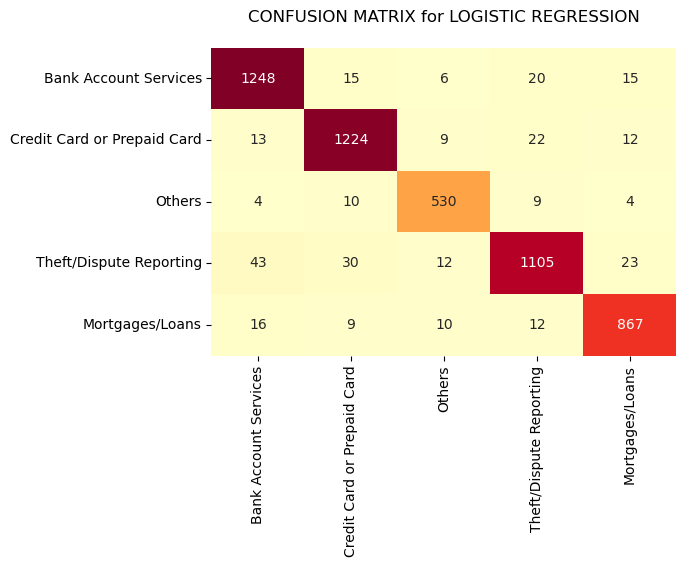

In [1104]:
# Evaluate the tuned Logistic Regression classifier
model_evaluate(y_test, y_pred_lr_tuned, model_name)

In [1105]:
import pandas as pd

In [1106]:
# Create a dataframe to store F1 Scores of all models we will build
f1_summary = pd.DataFrame([{'Model': 'Logistic Regression','F1 Score': round(f1_lr, 2),'F1 Score_tuned': round(f1_lr_tuned, 2)}])
f1_summary

,Model,F1 Score,F1 Score_tuned
0,Logistic Regression,0.92,0.94


- The overall accuracy of the Logistic Regression model is **94%**.
- The precision and recall are all the same **94%**, indicating a very good model.

## Second Model: `Naive-Bayes`

In [1107]:
# Import required library
from sklearn.naive_bayes import MultinomialNB

In [1108]:
# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.25, random_state=42)

In [1109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [1110]:
# Run the Multinomial Naive Bayes with default parameters
model_name = 'NAIVE BAYES'
nb = MultinomialNB()
%time 
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

CPU times: total: 0 ns
Wall time: 0 ns


In [1111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [1112]:
# Calculate F1 Score using weighted average method
f1_nb = f1_score(y_test, y_pred_nb, average="weighted")
f1_nb

0.6806576236206855

#### The accuracy is 68.07% from the base Naive-Bayes model.

### HyperParameter Tuning

In [1113]:
# Hyperparameter tuning for best result
#param_nb = {
#    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001),
#    'fit_prior':[True, False]
#}
#%time 
#grid_nb = GridSearchCV(estimator=nb, 
#                       param_grid=param_nb,
#                       verbose=1,
#                       scoring='f1_weighted',
#                       n_jobs=-1,
#                       cv=10)
#grid_nb.fit(X_train, y_train)
#print(grid_nb.best_params_)

In [1114]:
# Creating model with best hyperparameter
model_name = 'NAIVE BAYES'
nb_tuned = MultinomialNB(alpha=0.1,fit_prior=False)
nb_tuned.fit(X_train, y_train)
y_pred_nb_tuned = nb_tuned.predict(X_test)

In [1115]:
# Calculate F1 Score of model using weighted average method
f1_nb_tuned = f1_score(y_test, y_pred_nb_tuned, average="weighted")
f1_nb_tuned

0.780496759544609

### After tuning the Naive Bayes model, the accuracy increased from **68.06%** to **78.05%**.

In [1116]:
# Save Naive Bayes Regression Model
pickle.dump(nb_tuned, open("nb_model.pkl", "wb"))

#### Model Evaluation

In [1117]:
# Load pickled model
dt_monb_tuneddel = pickle.load(open("nb_model.pkl", "rb"))

CLASSIFICATION REPORT for NAIVE BAYES

                             precision    recall  f1-score   support

      Bank Account Services       0.77      0.84      0.80      1304
Credit Card or Prepaid Card       0.80      0.76      0.78      1280
                     Others       0.68      0.62      0.65       557
    Theft/Dispute Reporting       0.77      0.77      0.77      1213
            Mortgages/Loans       0.83      0.85      0.84       914

                   accuracy                           0.78      5268
                  macro avg       0.77      0.77      0.77      5268
               weighted avg       0.78      0.78      0.78      5268



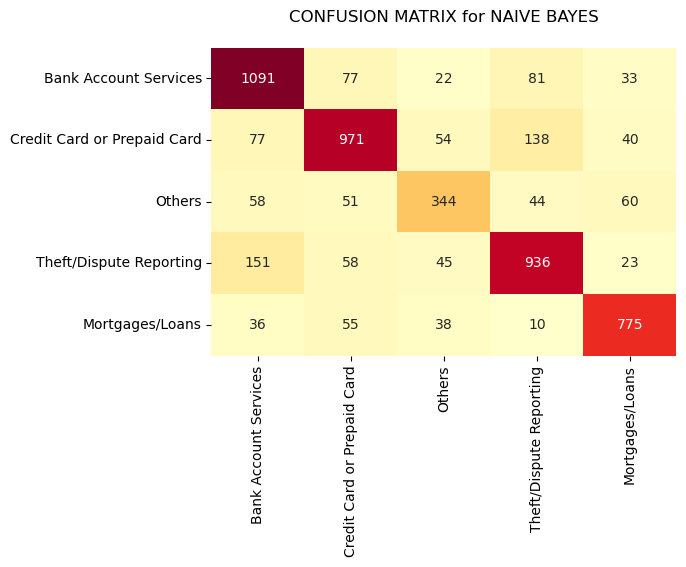

In [1118]:
# Evaluate the Naive Bayes classifier
model_evaluate(y_test, y_pred_nb_tuned, model_name)

In [1119]:
# Update the summary table
f1_summary.loc[len(f1_summary.index)] = ['Naive Bayes', round(f1_nb, 2), round(f1_nb_tuned, 2)]
f1_summary

,Model,F1 Score,F1 Score_tuned
0,Logistic Regression,0.92,0.94
1,Naive Bayes,0.68,0.78


- The overall accuracy of the Naive Bayes model is **78%**.
- The precision and recall are all the same **78%**, indicating a decent model.

## Third Model: `Decision Tree`

In [1120]:
# Import required library
from sklearn.tree import DecisionTreeClassifier

In [1121]:
# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.25, random_state=42)

In [1122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [1123]:
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [1124]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [1125]:
# Getting the score of the base model
f1_dt=dt.score(X_test, y_test)
f1_dt

0.7818906605922551

#### The accuracy is 78.19% from the base Decision Tree model.

### HyperParameter Tuning

In [1126]:
# Run Decision Tree with default hyperparameters
model_name = 'DECISION TREE'
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt =dt.predict(X_test)

In [1129]:
# Hyperparameter tuning for best result
#param_dt = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth' : [5, 10, 15, 20, 25, 30],
#    'min_samples_leaf':[1,5,10,15, 20, 25],
#}
#%time 
#grid_dt = GridSearchCV(estimator=dt, 
#                       param_grid=param_dt,
#                       verbose=1,
#                       scoring='f1_weighted',
#                       n_jobs=-1,
#                       cv=5)
#grid_dt.fit(X_train, y_train)
#print(grid_dt.best_params_)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 15}


In [1130]:
# Creating model with best hyperparameter
dt_tuned = DecisionTreeClassifier(criterion='gini', 
                                      max_depth=25, 
                                      min_samples_leaf=15, 
                                      )
dt_tuned.fit(X_train, y_train)
y_pred_dt_tuned = dt_tuned.predict(X_test)

In [1132]:
# Calculate F1 Score of tuned model using weighted average method
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned, average="weighted")
f1_dt_tuned

0.796607126328488

### After tuning the Decision Tree model, the accuracy increased from **78.19%** to **79.66%**.

In [1133]:
# Save Decision Tree Model
pickle.dump(dt_tuned, open("dt_model.pkl", "wb"))

#### Model Evaluation

In [1134]:
# Load pickled model
dt_tuned = pickle.load(open("dt_model.pkl", "rb"))

CLASSIFICATION REPORT for DECISION TREE

                             precision    recall  f1-score   support

      Bank Account Services       0.78      0.82      0.80      1304
Credit Card or Prepaid Card       0.84      0.82      0.83      1280
                     Others       0.79      0.78      0.78       557
    Theft/Dispute Reporting       0.77      0.73      0.75      1213
            Mortgages/Loans       0.80      0.84      0.82       914

                   accuracy                           0.80      5268
                  macro avg       0.80      0.80      0.80      5268
               weighted avg       0.80      0.80      0.80      5268



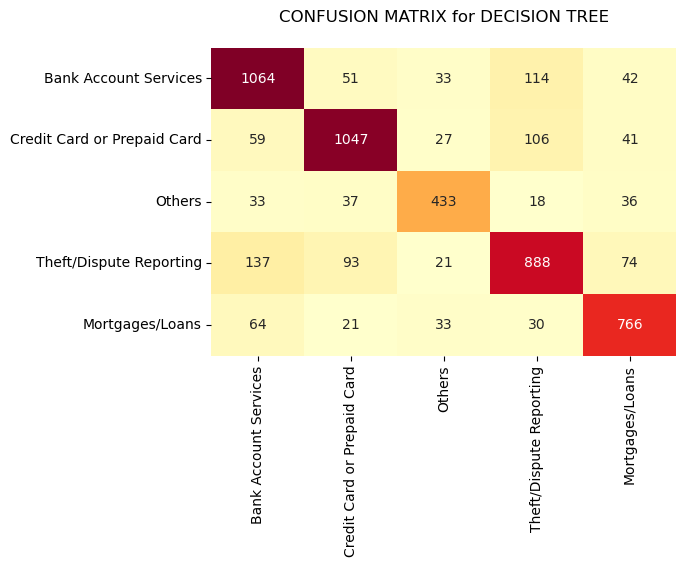

In [1135]:
# Evaluate the tuned Decision Tree classifier
model_evaluate(y_test, y_pred_dt_tuned, model_name)

In [1136]:
# Update the summary table
f1_summary.loc[len(f1_summary.index)] = ['Decision Tree', round(f1_dt, 2), round(f1_dt_tuned, 2)]
f1_summary

,Model,F1 Score,F1 Score_tuned
0,Logistic Regression,0.92,0.94
1,Naive Bayes,0.68,0.78
2,Decision Tree,0.78,0.80


- The overall accuracy of the Decision Tree model is **80%**.
- The precision and recall are all the same **80%**, indicating a good model.

## Fourth Model: `Random Forest`

In [2]:
# Importing Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier
# Importing Train, Test Split
from sklearn.model_selection import train_test_split

In [ ]:
# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.25, random_state=42)

In [1139]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [1140]:
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [1141]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [1142]:
# Getting the score of the base model
#f1_rf=rf.score(X_test, y_test)
#f1_rf

In [1143]:
# Run the Random Forest model on default hyperparameters
model_name = 'RANDOM FOREST'
clf_rf = RandomForestClassifier()
%time 
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

CPU times: total: 0 ns
Wall time: 0 ns


In [1144]:
# Calculate F1 Score using weighted average method
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")
f1_rf

0.8199626550160366

#### The accuracy is 81.99% from the base Random Forest model.

### HyperParameter Tuning

In [1147]:
 # Hyperparameter tuning to improve Random Forest performance
# param_grid_rf = {
#     'n_estimators': [100, 200, 300, 500, 800],
#     'criterion':['gini','entropy'],
#     'max_depth': [10, 30, 40],
#     'min_samples_split': [5, 10],
#     'min_samples_leaf': [1, 5, 10],
#     'max_features': ['log2', 'sqrt', None]    
# }
#%time
# grid_rf = RandomizedSearchCV(estimator=clf_rf, 
#                        param_distributions=param_grid_rf,
#                        scoring='f1_weighted',
#                        verbose=1,
#                        n_jobs=-1,
#                        cv=5)
# grid_rf.fit(X_train, y_train)
# print(grid_rf.best_params_)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 10 candidates, totalling 50 fits


##### Best Estimator parameters were identified below
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 30, 'criterion': 'gini'}

In [ ]:
# Run Random Forest on tuned hyperparameters
clf_rf_tuned = RandomForestClassifier(n_estimators=100, 
                                      min_samples_split=5, 
                                      min_samples_leaf=5, 
                                      max_features=None, 
                                      max_depth=30, 
                                      criterion='gini'
)
%time 
clf_rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = clf_rf_tuned.predict(X_test)

In [ ]:
# Calculate F1 Score of tuned model using weighted average method
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned, average="weighted")
f1_rf_tuned

0.8451950119318982

### After tuning the Randomn Forest model, the accuracy increased from **81.99%** to **84.52%**.

In [ ]:
# Save Random Forest Model
pickle.dump(rf_tuned, open("rf_model.pkl", "wb"))

#### Model Evaluation

In [ ]:
# Load pickled model
lr_tuned = pickle.load(open("rf_model.pkl", "rb"))

CLASSIFICATION REPORT for RANDOM FOREST

                             precision    recall  f1-score   support

      Bank Account Services       0.85      0.87      0.86      1304
Credit Card or Prepaid Card       0.87      0.87      0.87      1280
                     Others       0.82      0.83      0.82       557
    Theft/Dispute Reporting       0.83      0.79      0.81      1213
            Mortgages/Loans       0.85      0.87      0.86       914

                   accuracy                           0.85      5268
                  macro avg       0.84      0.84      0.84      5268
               weighted avg       0.85      0.85      0.85      5268



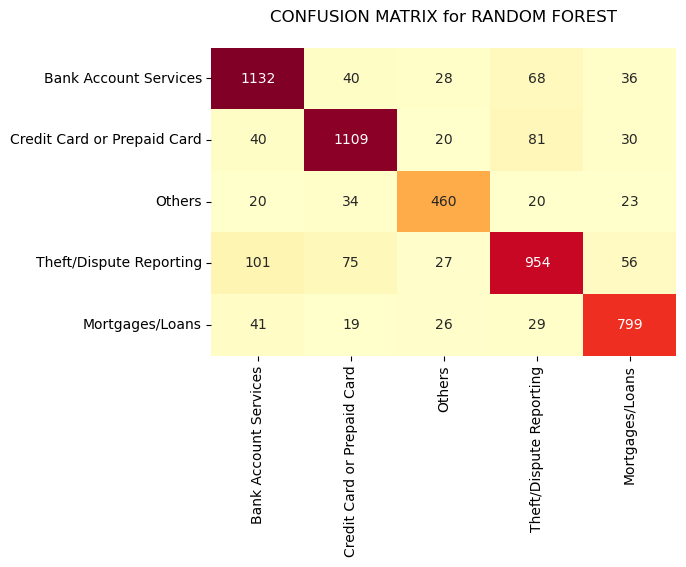

In [ ]:
# Evaluate the tuned Random Forest classifier
model_evaluate(y_test, y_pred_rf_tuned, model_name)

In [ ]:
# Update the summary table
f1_summary.loc[len(f1_summary.index)] = ['Random Forest', round(f1_rf, 2), round(f1_rf_tuned, 2)]
f1_summary

,Model,F1 Score,F1 Score_tuned
0,Logistic Regression,0.92,0.94
1,Naive Bayes,0.68,0.78
2,Decision Tree,0.78,0.80
3,Random Forest,0.81,0.85


- The overall accuracy of the Random Forest model is **85%**.
- The precision and recall are all the same **85%**, indicating a decent model.

#### Resutls: Among the three F1 scores for the three models, the F1 score for the Logistic Regression procedures is higher at *0.94*, indicating the best models among the three ones.

### Summary of the results

Four supervised models (Logistic Regression, Naive Bayes, Decision Tree Classifier, and Random Forest Classifier) were used to predict new complaints for the five Topics.

**Results**

*Logistic Regression*
- The accuracy for the Logistic Regression model is **94%**.
- The Precision and Recall are all 94%. Thus, this is the best models among the three ones.

*Naive Bayes*
- The accuracy for the Naive Bayes model is **78%**
-The Precision and Recall are all 78%. Thus, this is a decent model among the three ones.

*Decision Tree*
- The  accuracy for the Decision Tree model is **80%**
- The Precision and Recall are all 80%. Thus, this is a good model.

*Random  Forest*
- The  accuracy for the Random Forest model is **85%**
- The Precision and Recall are all 85%. Thus, this is a good model.

### Conclusion 😊

#### Based on the overall results above, the Logistic Regression is the best model, because the value of accuracy is the highest at **94%** along with the same best values of Precision and Recall at **94%** compared with the three other models.